In [15]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import community

In [35]:
#G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
g = nx.read_weighted_edgelist("../csv/edges_networkx.csv", delimiter=',', create_using = nx.Graph(), nodetype = int)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 2099
Number of edges: 21887
Average degree:  20.8547


In [36]:
nodes=pd.read_csv('../csv/nodes.csv')
old_nodes_df=nodes[nodes.PY<=2006]
new_nodes=nodes[nodes.PY>2006].index.values
#g.remove_nodes_from(new_nodes)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 2099
Number of edges: 21887
Average degree:  20.8547


Name: 
Type: Graph
Number of nodes: 2099
Number of edges: 21887
Average degree:  20.8547
30


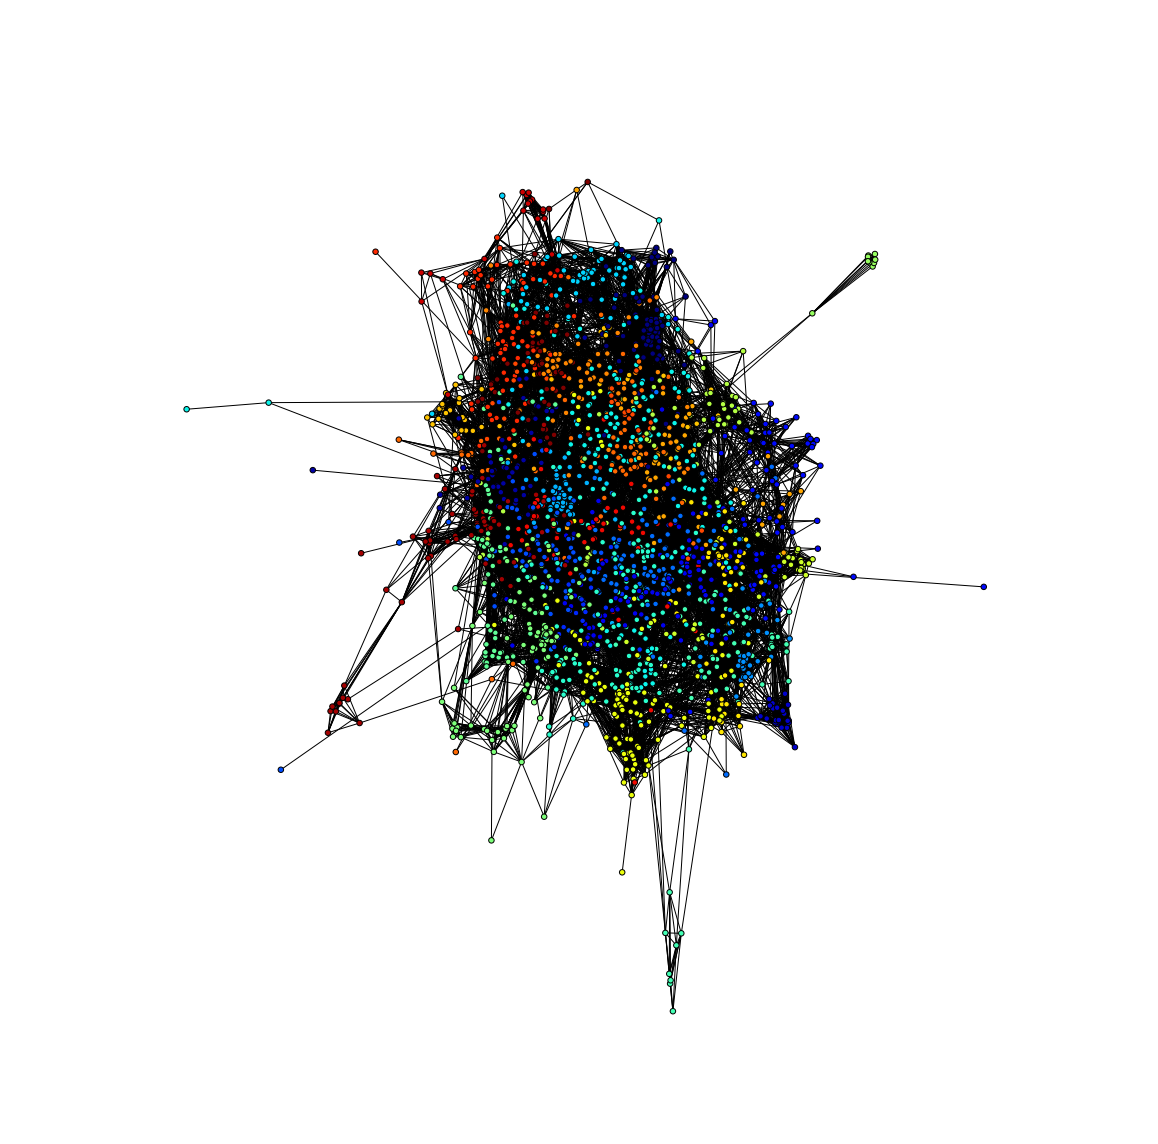

In [37]:
def cluster(g):
    deg = g.degree()
    to_remove = [n for n in deg if deg[n] == 0]
    g.remove_nodes_from(to_remove)
    print nx.info(g)
    spring_pos = nx.spring_layout(g)
    parts = community.best_partition(g)
    community.modularity(parts,g)
    values = [parts.get(node) for node in g.nodes()]
    print max(values)
    plt.figure(figsize=(20,20))
    plt.axis("off")
    nx.draw_networkx(g, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 30, with_labels = False)
    return(parts)
parts=cluster(g)

In [47]:
old_nodes_df=nodes
old_nodes_df['cluster']=0
for x in parts:
    old_nodes_df.set_value(x,'cluster',parts[x])
df=old_nodes_df

In [48]:
dg=df[['id','cluster']].groupby('cluster').count()
dg=dg.reset_index(drop=True)
dg.rename(columns={'id':'cluster size'},inplace=True)

In [49]:
df['cluster size']=df.cluster.apply(lambda x: dg.iloc[x])

In [50]:
docs=df.label

In [51]:
import re
from nltk import stem
porter = stem.porter.PorterStemmer()
from collections import Counter
docs_cleaned = [[re.sub('[.!,;?()\W\d]+', '', word) for word in doc.lower().split()] for doc in docs]

In [52]:
stop= open ('stopList.txt').read()
stop_list = set(stop.replace("\n", " ").split())
docs_stemed = [[porter.stem(word) for word in document if word not in stop_list] for document in docs_cleaned]

In [53]:
df['ind']=df.index
df['terms']= docs_stemed

In [54]:
dg['keyword']=''
dg['key terms']=''

for mod in dg.index:
    mod_terms=[]
    for terms in df[df.cluster==mod].terms:
        for term in terms:
            mod_terms.append(term)
            
    words = [word for word in mod_terms if word != '']                
    words_counter = Counter(words)
    top_words=[word for word in words_counter.most_common(5) if word[1]>1]
    dg.set_value(mod,'keyword',top_words)
    
    terms = [words[i]+' '+words[i+1] for i in range(len(words)-1)]
    terms_counter= Counter(terms)
    top_terms=[term for term in terms_counter.most_common(5) if term[1]>1]
    dg.set_value(mod,'key terms',top_terms)

In [55]:
dg.sort_values('cluster size')

,cluster size,keyword,key terms
16,9,"[(negoti, 9), (analysi, 2), (support, 2), (concess, 2)]","[(negoti support, 2)]"
28,19,"[(agil, 15), (develop, 7), (program, 6), (technolog, 4), (organiz, 4)]","[(organiz agil, 4), (softwar develop, 3), (system develop, 2), (agil system, 2), (agil distribut, 2)]"
5,25,"[(standard, 23), (network, 8), (system, 8), (technolog, 5), (cost, 4)]","[(switch cost, 3), (system secur, 2), (ebusi standard, 2), (convers technolog, 2), (standard make, 2)]"
2,26,"[(auction, 26), (onlin, 11), (combinatori, 7), (price, 6), (bid, 4)]","[(onlin auction, 8), (combinatori auction, 6), (iter combinatori, 2), (comput analysi, 2), (bidder strategi, 2)]"
25,30,"[(piraci, 15), (ethic, 8), (digit, 7), (softwar, 6), (good, 4)]","[(softwar piraci, 4), (digit good, 2), (experi good, 2), (strategi presenc, 2), (piraci price, 2)]"
18,36,"[(review, 22), (product, 12), (onlin, 11), (system, 8), (emot, 7)]","[(product review, 7), (onlin product, 5), (onlin review, 5), (consum review, 3), (system product, 2)]"
21,42,"[(system, 13), (disciplin, 9), (journal, 6), (error, 6), (detect, 5)]","[(divers system, 3), (refer disciplin, 2), (empir investig, 2), (ident crisi, 2), (system refer, 2)]"
8,44,"[(privaci, 30), (person, 14), (concern, 10), (onlin, 9), (model, 8)]","[(privaci concern, 8), (web person, 4), (elabor likelihood, 3), (privaci protect, 3), (likelihood model, 3)]"
22,53,"[(decis, 20), (system, 15), (recommend, 12), (support, 10), (model, 8)]","[(decis support, 8), (decis aid, 5), (decis make, 5), (support system, 5), (recommend agent, 4)]"
20,53,"[(price, 40), (market, 12), (channel, 11), (good, 10), (electron, 10)]","[(price dispers, 4), (electron channel, 4), (market evid, 2), (strategi presenc, 2), (empir analysi, 2)]"


In [28]:
#dendrogram=community.generate_dendrogram(G_fb)[0]
#dendrogram
#com=community.induced_graph(parts,G_fb)
#nx.draw_networkx(com,cmap = plt.get_cmap("jet"), node_size = 10, with_labels = False)